In [1]:
using LinearAlgebra, Random, Plots

#=This method computes the Lyapunov exponent of a given random matrix A and a random rotation 
given by RandomRot. Size of block matrices are controlled 
by d. transProb controls the transition rate between expansion/contraction and rotation matrices.
L controls size of contraction/expansion. epsilon controls size of geodesic ball in SO(R^2d). 
=#
function LyapunovIterates(d,L,transProb,epsilon,nits)
    randVec = [randn() for n in 1:2d];
    current = randVec/norm(randVec);
    vecHist = [];
    LyapHist = [];
    
    #First we initialize the first n iterates according to nits.
    for i = 1:nits
        A = RandomA(d,L,transProb)
        Rot = RandomRot(2*d,epsilon)
        current = A*Rot*current
        append!(LyapHist,log(norm(current)))
        append!(vecHist,(1-(2/pi)*atan(norm(current[d+1:2d]),norm(current[1:d]))))
        current = current/norm(current)
    end
    
    len = length(LyapHist)
    println(string("Top Lyapunov exponent over last 10% of ", nits , " trials: ", 
            sum(LyapHist[Int(floor(0.9*len)):len])/(len-floor(0.9*len))))
    println(string("Log(L) = ", log(L)))
    plot1 = histogram(LyapHist,bins=50, label="Lyap");
    display(plot1)
    plot2 = histogram(vecHist,bins=50,label="Alignment Score. 1=Expansion");
    display(plot2)
end


function RandomRot(d,epsilon)
    A = zeros((d,d))
    #=This based on uniform sampling of radius epsilon ball given by 
    https://bit.ly/3jgaSJH 
    =#
    for i = 1:d
        for j = 1:d
            if i > j
                A[i,j] = randn()
                A[j,i] = - A[i,j]
            elseif  i == j
                A[i,j] = 0
            end
        end
    end
    r = (epsilon*rand())^(2/(d*(d-1)))
    B = (A/norm(A))*r
    C = exp(B)
    return C
end

function RandomA(d,L,transProb)
    s= rand()
    if s <= transProb
        A = vcat(hcat(L*Matrix(I,d,d),zeros(d,d)),hcat(zeros(d,d),Matrix(I,d,d)/L))
    elseif s > transProb
        A =  vcat(hcat(zeros(d,d),-Matrix(I,d,d)),hcat(Matrix(I,d,d),zeros(d,d)))
    end
    return A
end


RandomA (generic function with 1 method)

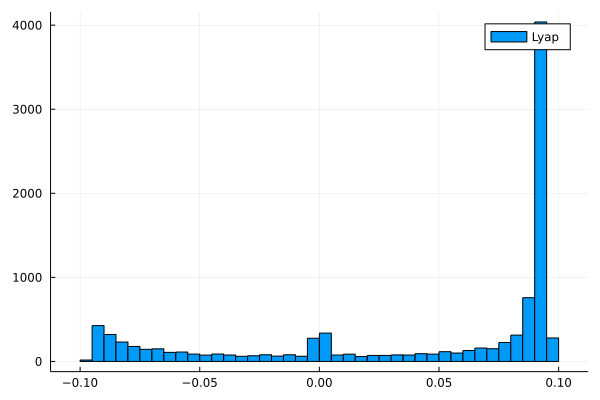

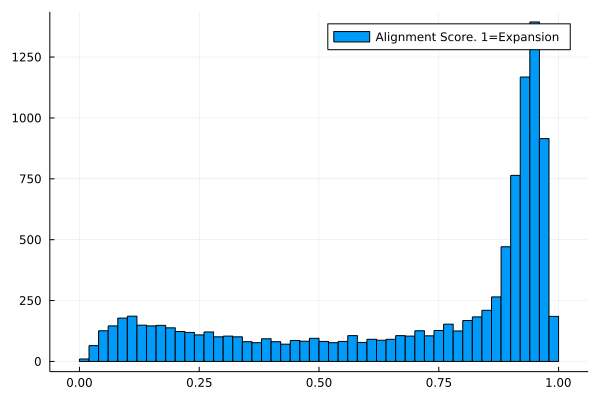

Top Lyapunov exponent over last 10% of 10000 trials: 0.039956992669703366
Log(L) = 0.09531017980432493


In [10]:
LyapunovIterates(3,1.1,0.95,0.0000000001,10000)

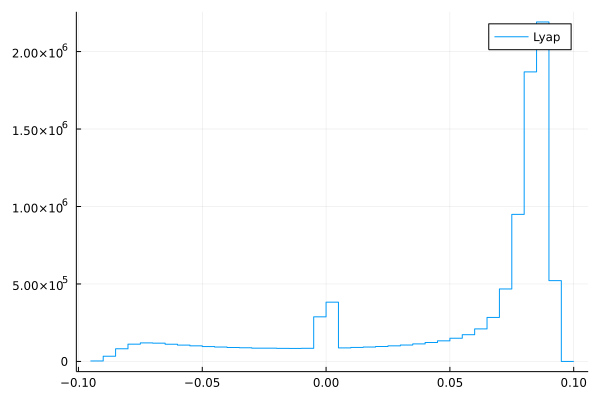

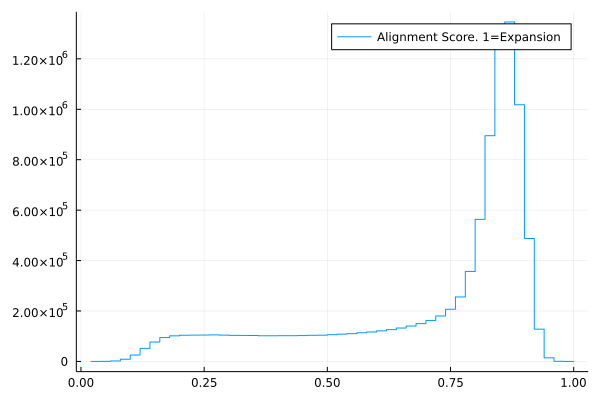

Top Lyapunov exponent over last 10% of 10000000 trials: 0.050190124166794116
Log(L) = 0.09531017980432493


In [11]:
LyapunovIterates(10,1.1,0.95,0.0000001,10000000)